In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df['customerID'].unique().shape

(7043,)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Select 70 percent of data as a train set
#np.random.seed(1) # for reproducibility
#train_id = np.random.choice(len(df), round(0.7*len(df)), replace=False)
#test_id = list(set(range(len(df))) - set(train_id))
#train = df.take(train_id)
#test = df.take(test_id)

In [8]:
df.isna().sum().sum()

0

Our data is already cleaned from the missing values

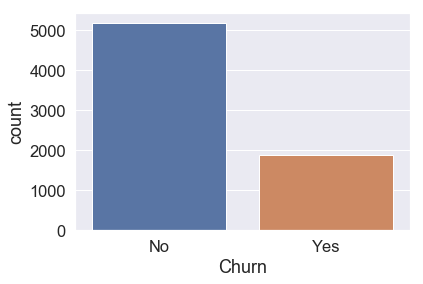

In [9]:
sns.set(font_scale=1.5)
sns.countplot(x='Churn', data=df)

In [10]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

The data is imbalanced as we have more than twice as much data for customers that did not churn than for those who churned.

In [11]:
numerical_cols = set(df._get_numeric_data().columns)
categorical_cols = set(df.columns) - numerical_cols
print('Numerical columns: \t', numerical_cols, '\n')
print('Categorical columns: \t', categorical_cols)

Numerical columns: 	 {'MonthlyCharges', 'SeniorCitizen', 'tenure'} 

Categorical columns: 	 {'TotalCharges', 'DeviceProtection', 'PaymentMethod', 'Dependents', 'gender', 'Partner', 'PaperlessBilling', 'InternetService', 'Contract', 'OnlineBackup', 'customerID', 'OnlineSecurity', 'StreamingTV', 'TechSupport', 'PhoneService', 'StreamingMovies', 'MultipleLines', 'Churn'}


In [12]:
categorical_cols -= {'customerID','Churn'}

In [13]:
categorical_cols

{'Contract',
 'Dependents',
 'DeviceProtection',
 'InternetService',
 'MultipleLines',
 'OnlineBackup',
 'OnlineSecurity',
 'PaperlessBilling',
 'Partner',
 'PaymentMethod',
 'PhoneService',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'TotalCharges',
 'gender'}

In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
TotalCharges_empty_inds = np.where(df['TotalCharges'].values == ' ')[0]

In [16]:
TotalCharges_empty_inds

array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],
      dtype=int64)

In [17]:
TotalCharges_num_inds = np.arange(len(df))
TotalCharges_num_inds = np.delete(TotalCharges_num_inds, TotalCharges_empty_inds)
df.loc[TotalCharges_num_inds, 'TotalCharges'] = df.loc[TotalCharges_num_inds, 'TotalCharges'].apply(lambda x: float(x))
df.loc[TotalCharges_empty_inds, 'TotalCharges'] = df.loc[TotalCharges_num_inds, 'TotalCharges'].median()
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].apply(lambda x: float(x))

In [18]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
categorical_cols.remove('TotalCharges')
numerical_cols.add('TotalCharges')

categorical_cols.add('SeniorCitizen')
numerical_cols.remove('SeniorCitizen')

8


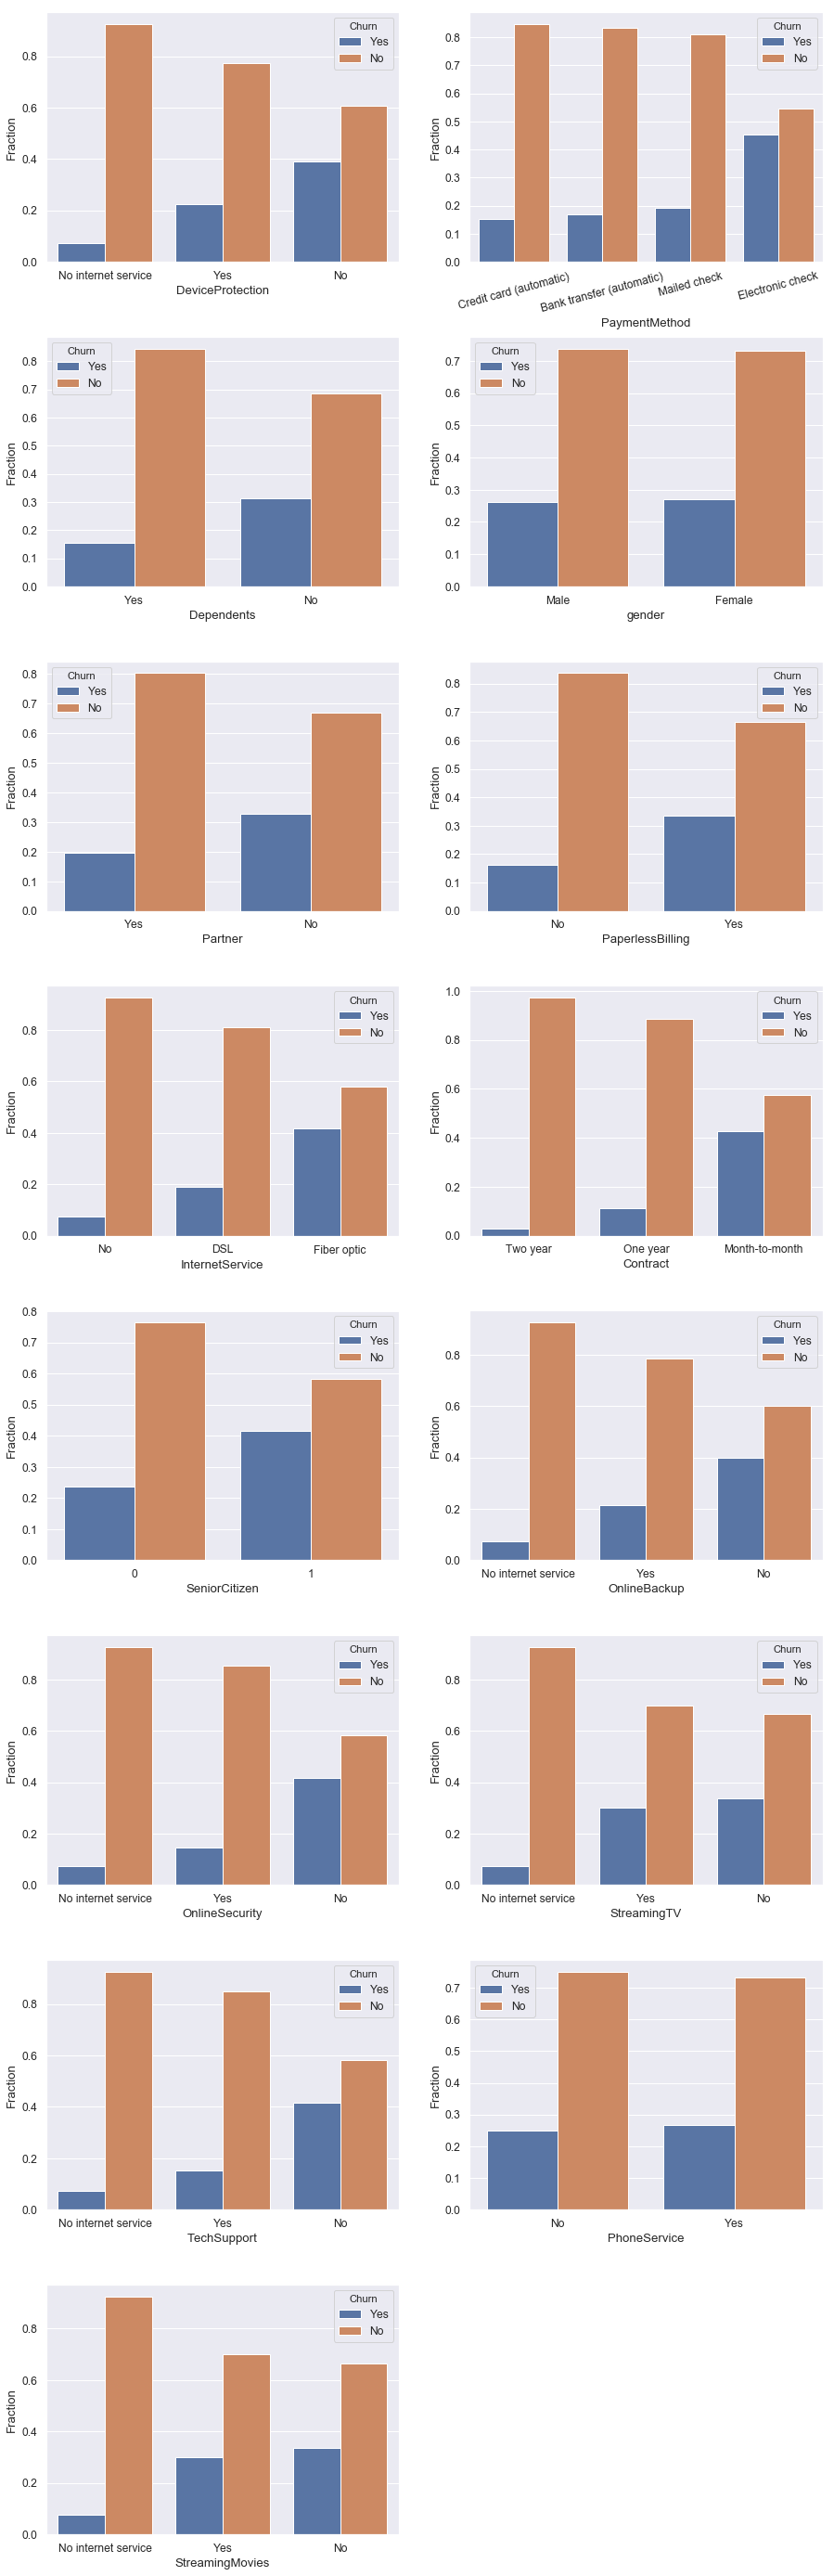

In [20]:
cols = list(categorical_cols)

plt.figure(figsize=(15, 50))
sns.set(font_scale=1.1)
nrows = int(np.ceil(len(cols)/2))

print(nrows)
for i in range(1, len(cols)):
    plt.subplot(nrows, 2, i)
    q = (df.groupby([cols[i-1]])['Churn']
                     .value_counts(normalize=True)
                     .rename('Fraction')
                     .reset_index()
                     .sort_values('Fraction'))
    plot = sns.barplot(x=cols[i-1], y='Fraction', hue='Churn', data=q)
    if cols[i-1] == 'PaymentMethod':
        plot.set_xticklabels(plot.get_xticklabels(),rotation=15)
    else:
        plot.set_xticklabels(plot.get_xticklabels(),rotation=0)
plt.subplots_adjust(hspace=0.3, wspace=0.2)

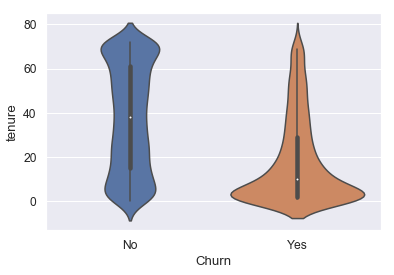

In [21]:
sns.violinplot(x='Churn', y='tenure', data=df)

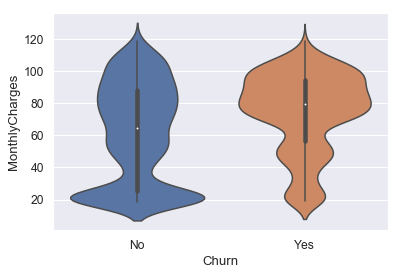

In [22]:
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)

In [23]:
categorical_cols

{'Contract',
 'Dependents',
 'DeviceProtection',
 'InternetService',
 'MultipleLines',
 'OnlineBackup',
 'OnlineSecurity',
 'PaperlessBilling',
 'Partner',
 'PaymentMethod',
 'PhoneService',
 'SeniorCitizen',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'gender'}

In [24]:
df = pd.get_dummies(df, columns=list(categorical_cols))
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),...,TechSupport_No internet service,TechSupport_Yes,PhoneService_No,PhoneService_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,1,29.85,29.85,No,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,No,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
2,3668-QPYBK,2,53.85,108.15,Yes,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
3,7795-CFOCW,45,42.30,1840.75,No,0,0,1,1,0,...,0,1,1,0,1,0,0,0,1,0
4,9237-HQITU,2,70.70,151.65,Yes,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [25]:
df.drop(['customerID'], axis = 1, inplace=True)

In [26]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [27]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,TechSupport_No internet service,TechSupport_Yes,PhoneService_No,PhoneService_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,1,29.85,29.85,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1,34,56.95,1889.50,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,2,53.85,108.15,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
3,45,42.30,1840.75,0,0,0,1,1,0,0,...,0,1,1,0,1,0,0,0,1,0
4,2,70.70,151.65,1,1,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0


In [28]:
df.corr()['Churn'].sort_values()

tenure                                    -0.352229
Contract_Two year                         -0.302253
StreamingMovies_No internet service       -0.227890
TechSupport_No internet service           -0.227890
StreamingTV_No internet service           -0.227890
DeviceProtection_No internet service      -0.227890
OnlineSecurity_No internet service        -0.227890
OnlineBackup_No internet service          -0.227890
InternetService_No                        -0.227890
TotalCharges                              -0.199037
PaperlessBilling_No                       -0.191825
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
SeniorCitizen_0                           -0.150889
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMetho

In [29]:
df.to_csv('data/data_processed.csv', index=False)